In [1]:
import numpy as np
import pandas as pd


In [32]:
data=pd.read_csv('houseprice.csv',header=None)
data.describe()

,0,1,2,3,4,5,6
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,1.807303,1.918338,3.183381,0.569580,28.061127,0.593123,16.386213
std,0.641461,0.641735,0.750265,0.777879,34.900899,0.491486,6.765156
min,0.672000,1.000000,1.000000,0.000000,0.000000,0.000000,1.685800
25%,1.336000,1.500000,3.000000,0.210000,6.000000,0.000000,11.201400
50%,1.672000,2.000000,3.000000,0.390000,18.000000,1.000000,15.191700
75%,2.206000,2.500000,4.000000,0.600000,34.000000,1.000000,20.523500
max,4.534000,4.500000,6.000000,9.000000,247.000000,1.000000,44.643600


In [33]:
columns=data.shape[1]

total=1047
train=int(total*0.8)

#Training Data 80%
#Test Data 20%

#Input and output features of Training Data
X=data.iloc[0:train,:-1].values
y=data.iloc[0:train,columns-1:columns].values
m=len(X)#Length of training data
X=(X-X.mean())/(X.std())# Normalising the inputs


In [34]:
#Input and output features of Test Data
X1=data.iloc[train:total,:-1].values #iloc is similar to array slicing
y1=data.iloc[train:total,columns-1:columns].values

X1=(X1-X1.mean())/(X1.std())# Normalising the inputs
m1=len(X1)#Length of Test data

In [35]:
X=np.hstack((np.ones((m,1)),X))#hstack to add colums
X1=np.hstack((np.ones((m1,1)),X1))# adding X0 unit which is one for all rows
theta=np.zeros((1,X.shape[1]))
Lambda=1

In [36]:
def CostFunction(theta,X,y):
 
    predictedvalues = X.dot(theta.T)
    squarederror = (np.power((predictedvalues- y),2))
    Cost = (1/m) *(np.sum(squarederror))
    RegCost = Cost + (Lambda/m) *(np.sum(np.power((theta.T),2))) #Regularising the cost function
    
    #Finding dJ/dtheta and regularising it also
    gradient=1/m * (X.transpose()).dot((predictedvalues - y))
    grad1=gradient[0]
    grad1=np.array(grad1).reshape(len(grad1),1)
    grad2= gradient[1:] + (Lambda/m)* (theta.T[1:])
    gradient= np.vstack((grad1,grad2)) # vstack to add rows
    
    return RegCost, gradient

In [37]:
cost,grad=CostFunction(theta,X,y)
print("Initial Cost value is {}".format(cost))#theta is initially zero values  matrix
alpha=1
iterations=5000


Initial Cost value is 313.7844923206929


In [38]:
def GradientDescent(theta,X,y):
  
    costvalues =np.zeros((iterations,1))#(To store cost values in each iteration)
    for i in range(iterations):
   
        cost,derivative=CostFunction(theta,X,y)# derivative is dJ/dtheta
        thetadescent = alpha * (1/m) * derivative.T
        theta=theta-thetadescent
        costvalues[i]=cost
    
    return theta,costvalues

In [39]:
theta, costvalues = GradientDescent(theta,X,y)
cost,grad=CostFunction(theta,X,y)#theta is minimised using gradient descent
print("After finding minimum values for theta cost is {}".format(cost))

After finding minimum values for theta cost is 43.72724219389181


In [40]:
#Sum of the examples to predict accuracay
import math
def accuracy(X,Theta,y):
    error=np.sum(X.dot(Theta.T))
    error1=(1/len(y))*(abs(error-np.sum(y)))
   
    return error1



In [44]:
#Training  examples accuracy

Accuracy=accuracy(X,theta,y)
print("Training set Accuarcy is {}".format(Accuracy))

#Test Examples Accuracy

Accuracy=accuracy(X1,theta,y1)
print("Test set Accuarcy is {}".format(Accuracy))





Training set Accuarcy is 0.15970050873377484
Test set Accuarcy is 0.3132666127484927


Text(0.5, 1.0, 'Error vs. No of iterations')

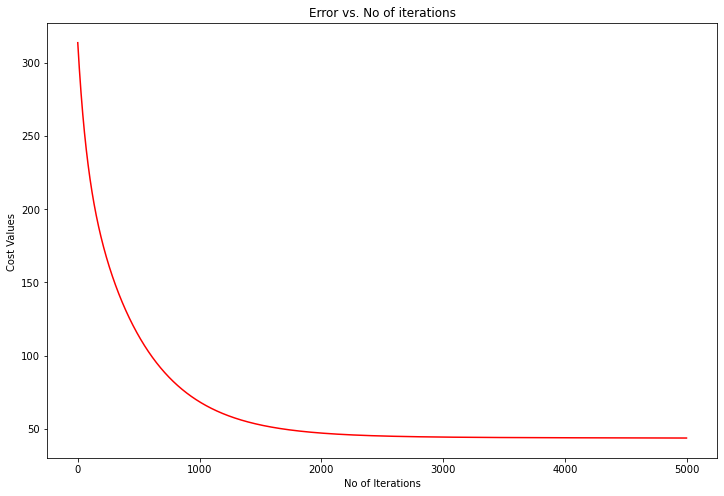

In [45]:
# plot for Squared error and no of iterations
import matplotlib.pyplot as py
fig,sub = py.subplots(figsize=(12,8))
sub.plot(np.arange(5000),costvalues , 'r')
sub.set_xlabel('No of Iterations')
sub.set_ylabel('Cost Values ')
sub.set_title('Error vs. No of iterations')